In [49]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
params = {
    '$where': "Date>='2019-01-01'",
    '$limit': 20000,
}
## Info on this dataset https://data.bts.gov/Research-and-Statistics/Border-Crossing-Entry-Data/keg4-3bc2
resp = requests.get('https://data.bts.gov/resource/keg4-3bc2.json', params = params)

In [112]:
bc = pd.DataFrame.from_records(resp.json())

bc = bc.astype({
    'value': 'int32',
})
bc['value'] = bc['value'] * 12
bc['date'] = pd.to_datetime(bc['date'])
bc.set_index('date', inplace=True)

In [114]:
mex_bc = bc[bc['border']=='US-Mexico Border']

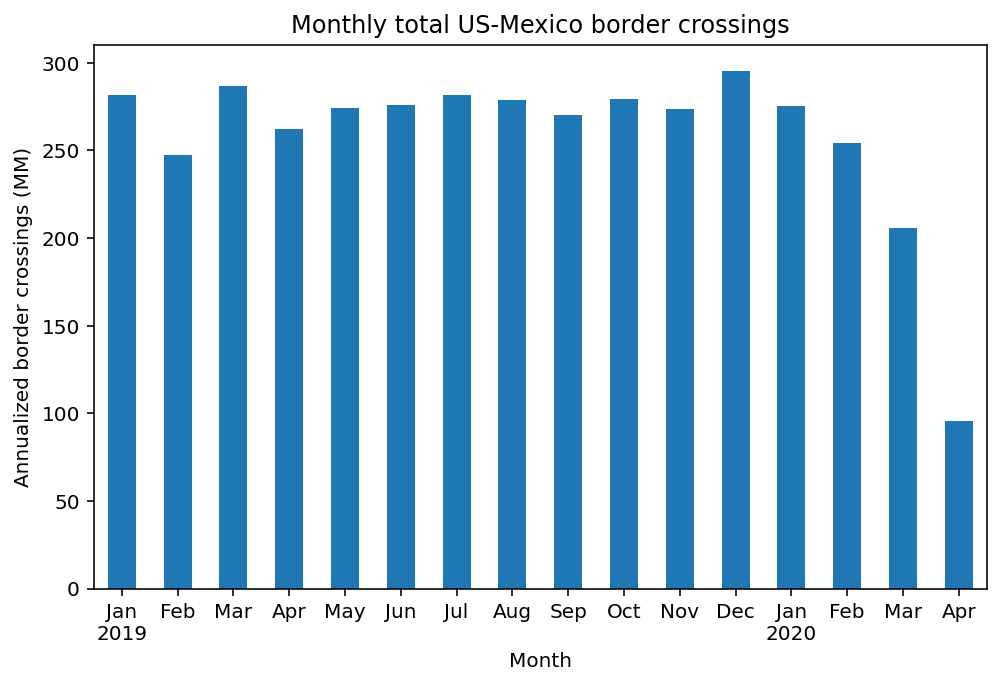

In [175]:
from matplotlib.dates import DateFormatter, MonthLocator
from matplotlib.ticker import FuncFormatter

mex_bc_bymonth = mex_bc.groupby(pd.Grouper(freq='M')).sum()
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=144)

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

mex_bc_bymonth.plot(kind='bar', ax=ax, rot=0, legend=False)
ax.set_xticklabels(map(lambda x: line_format(x), mex_bc_bymonth.index))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, y: int(x / 1000000)))

ax.set_title('Monthly total US-Mexico border crossings')
ax.set_xlabel('Month')
ax.set_ylabel('Annualized border crossings (MM)');
